In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining RK4

def integ_rk4(f, x_i, x_f, initial_conds, N):
    h = (x_f - x_i)/N
    def rk4(f, x, y, h):
        k1 = h * f(x, y, params)
        k2 = h * f(x + h/2, y + k1/2, params)
        k3 = h * f(x + h/2, y + k2/2, params)
        k4 = h * f(x + h, y + k3, params)
        return (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
    
    x_vals = np.arange(x_i, x_f, h)

    y = np.zeros((N, len(initial_conds)))
    y[0] = initial_conds

    for i in range(N - 1):
        y[i + 1] = y[i] + rk4(f, x_vals[i], y[i], h)

    return x_vals, y

In [3]:
states = np.array([i for i in range(1,11)]) #Defining the states
pi_0 = np.random.uniform(0,1,10) #Initial distribution (Non-normalized)
pi_0_normalized = [i/sum(pi_0) for i in pi_0] #Normalized

We are working with
$$
\frac{dp(n)}{dt} = \alpha p(n-1) - \delta n p(n) - \alpha p(n) + \delta (n+1) p(n+1)
$$
so our function will be

In [23]:
alpha = 0.6
delta = 0.4
params = [alpha, delta]

def F(x, y, params):
    F = np.zeros(len(y))
    for i in range(0,len(F) - 1):
        if i == 0:
            F[i] = - params[1] * (i+1) * y[i] - params[0] * y[i-1] + params[1] * (i+2) * y[i+1]

        elif i == len(F):
            F[i] = params[0] * y[i-1] - params[1] * (i+1) * y[i] - params[0] * y[i]      
            
        else:
            F[i] = params[0] * y[i-1] - params[1] * (i+1) * y[i] - params[0] * y[i] + params[1] * (i+2) * y[i+1]


    return F

In [24]:
t_i = 0
t_f = 10
N = 100

t, p = integ_rk4(F, t_i, t_f, pi_0_normalized, N)

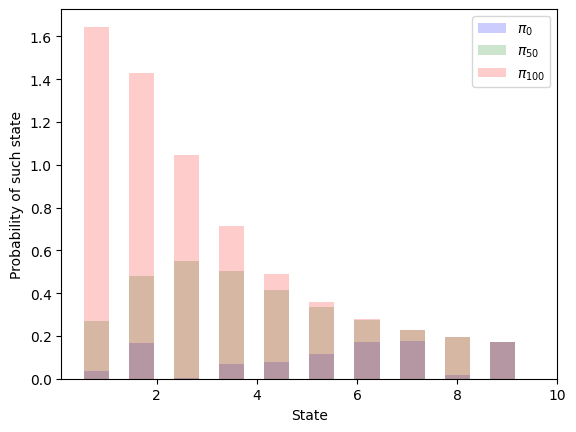

In [25]:
plt.hist(states, bins = 10, weights= p[0,:], width = 0.5,align="left", color = "blue", alpha=0.2, label = "$\\pi_{0}$")
plt.hist(states, bins = 10, weights= p[50,:], width = 0.5, align="left", color = "green", alpha=0.2, label = "$\\pi_{50}$")
plt.hist(states, bins = 10, weights= p[99,:], width = 0.5, align="left", color = "red", alpha=0.2, label = "$\\pi_{100}$")
plt.xlabel("State")
plt.ylabel("Probability of such state")
plt.legend()